In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls
import os
import yaml
from yaml import Loader
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import copy
from utils_graphs import select_significant_areas, create_graph, plot_graph, get_colors, fig_graph_degrees
import matplotlib.colors as cm
from matplotlib.lines import Line2D

In [2]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [3]:
def plot_contrasts(df_data, index, ax):
    df = df_data.iloc[index]
    df = pd.DataFrame(df).T
    df = pd.melt(df)
    sns.barplot(x = df.value, 
        y = df.variable, 
        ax=ax,
        data=df,
        palette=sns.color_palette("Accent"))

In [4]:
def plot_saliences(df_data, index, ax, df_levels):
    df = df_data.iloc[index]
    df = pd.DataFrame(df).T
    df = pd.melt(df)
    df['Brain Hierarchy'] = [df_levels[df_levels['area']==area]['name_parent_l5'].values[0] for area in df['variable']]
    sns.barplot(y = df.value, 
                x = df.variable, 
                ax=ax, 
                hue=df['Brain Hierarchy'],
                data=df,
                dodge=False,
                palette=sns.color_palette("Paired"))

# WITH FATHER

In [5]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
batch='c57'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
contrasts = pd.read_csv('./results_pls/c57_contrasts.csv')
saliences = pd.read_csv('./results_pls/c57_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", 
                                      "group_Fam": "Familiar", 
                                      "group_Unfam":"Unfamiliar"})
df_levels = upls.create_df_levels(volumes)

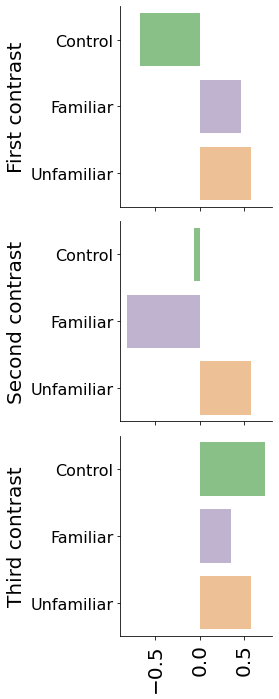

In [6]:
fig, axes = plt.subplots(3,1, sharex='col', figsize=(4,10))
plot_contrasts(df_data=contrasts, index=0, ax=axes[0])
plot_contrasts(df_data=contrasts, index=1, ax=axes[1])
plot_contrasts(df_data=contrasts, index=2, ax=axes[2])
axes[0].set_ylabel('First contrast', fontsize=20)
axes[1].set_ylabel('Second contrast', fontsize=20)
axes[2].set_ylabel('Third contrast', fontsize=20)
axes[0].tick_params(axis='y', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='x', labelrotation=90, labelsize=20)
for i in range(3):
    axes[i].set(xlabel=None)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('./results_pls/BL_wF_pls_contrasts_SINS.png')
plt.savefig('./results_pls/BL_wF_pls_contrasts_SINS.svg')

In [7]:
def plot_contrasts2(df_data, index, ax):
    df = df_data.iloc[index]
    df = pd.DataFrame(df).T
    df = pd.melt(df)
    sns.barplot(y = df.value, 
        x = df.variable, 
        ax=ax,
        data=df,
        palette=sns.color_palette("Accent"))

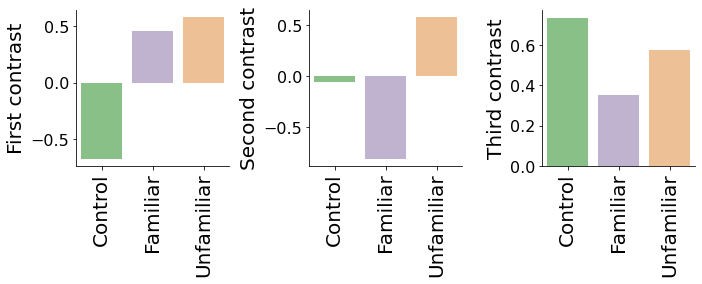

In [8]:
fig, axes = plt.subplots(1,3, sharex='col', figsize=(10,4))
plot_contrasts2(df_data=contrasts, index=0, ax=axes[0])
plot_contrasts2(df_data=contrasts, index=1, ax=axes[1])
plot_contrasts2(df_data=contrasts, index=2, ax=axes[2])
axes[0].set_ylabel('First contrast', fontsize=20)
axes[1].set_ylabel('Second contrast', fontsize=20)
axes[2].set_ylabel('Third contrast', fontsize=20)
axes[0].tick_params(axis='y', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='y', labelsize=16)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=20)
axes[2].tick_params(axis='x', labelrotation=90, labelsize=20)
for i in range(3):
    axes[i].set(xlabel=None)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('./results_pls/BL_wF_pls_contrasts_SINS_transposed.png')
plt.savefig('./results_pls/BL_wF_pls_contrasts_SINS_transposed.svg')

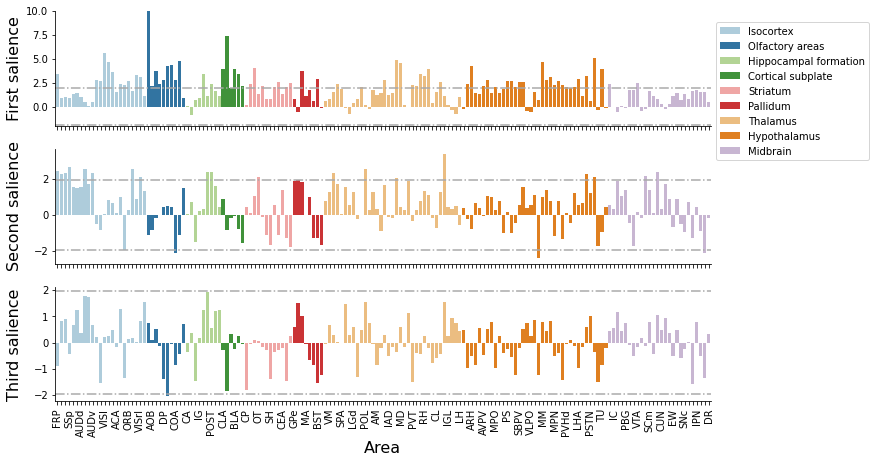

In [9]:
fig, axes = plt.subplots(3,1, sharex='row', figsize=(13,7))
plt.subplots_adjust(top=0.9, left=0.1, right=0.8)
plot_saliences(df_data=saliences, index=0, ax=axes[0], df_levels=df_levels)
plot_saliences(df_data=saliences, index=1, ax=axes[1], df_levels=df_levels)
plot_saliences(df_data=saliences, index=2, ax=axes[2], df_levels=df_levels)
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('')
axes[0].set(xticklabels=[])
axes[0].set_ylim(-2,10)
axes[1].set_xlabel('')
axes[1].set(xticklabels=[])
axes[0].set_ylabel('First salience', fontsize=16)
axes[1].set_ylabel('Second salience', fontsize=16)
axes[2].set_ylabel('Third salience', fontsize=16)
fig.align_ylabels(axes)
axes[2].set_xlabel('Area', fontsize=16)
axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
axes[1].get_legend().remove()
axes[2].get_legend().remove()
sns.despine(left=False, bottom=False)
n = 3  # Keeps every 7th label
for i in range(3):
    axes[i].axhline(y=1.96, linestyle='-.', color='darkgrey')
    axes[i].axhline(y=-1.96, linestyle='-.', color='darkgrey')
    [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
plt.savefig('./results_pls/BL_wF_pls_saliences_SINS.png')
plt.savefig('./results_pls/BL_wF_pls_saliences_SINS.svg')

# WITHOUT FATHER

In [10]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='c57_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
contrasts = pd.read_csv('./results_pls/BL_woF2000_contrasts.csv')
saliences = pd.read_csv('./results_pls/BL_woF2000_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", 
                                      "group_Fam": "Familiar", 
                                      "group_Unfam":"Unfamiliar"})

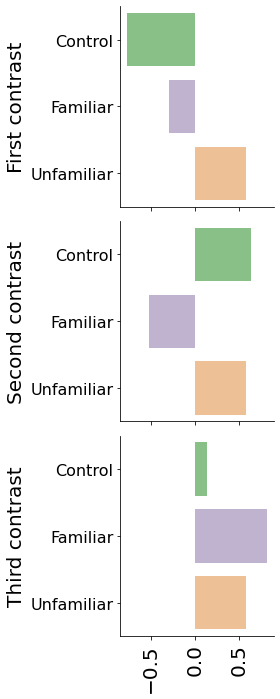

In [11]:
fig, axes = plt.subplots(3,1, sharex='col', figsize=(4,10))
plot_contrasts(df_data=contrasts, index=0, ax=axes[0])
plot_contrasts(df_data=contrasts, index=1, ax=axes[1])
plot_contrasts(df_data=contrasts, index=2, ax=axes[2])
axes[0].set_ylabel('First contrast', fontsize=20)
axes[1].set_ylabel('Second contrast', fontsize=20)
axes[2].set_ylabel('Third contrast', fontsize=20)
axes[0].tick_params(axis='y', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='y', labelsize=16)
axes[2].tick_params(axis='x', labelrotation=90, labelsize=20)
for i in range(3):
    axes[i].set(xlabel=None)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('./results_pls/BL_woF_pls_contrasts_SINS.png')

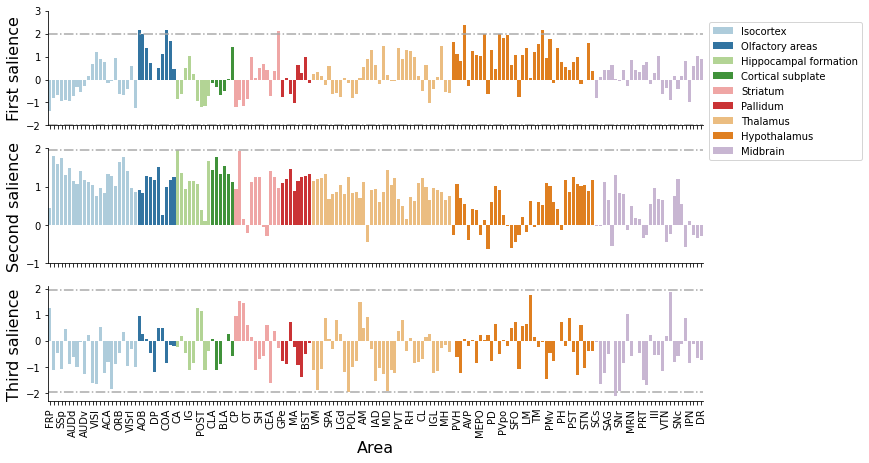

In [12]:
fig, axes = plt.subplots(3,1, sharex='row', figsize=(13,7))
plt.subplots_adjust(top=0.9, left=0.1, right=0.8)
plot_saliences(df_data=saliences, index=0, ax=axes[0], df_levels=df_levels)
plot_saliences(df_data=saliences, index=1, ax=axes[1], df_levels=df_levels)
plot_saliences(df_data=saliences, index=2, ax=axes[2], df_levels=df_levels)
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('')
axes[0].set(xticklabels=[])
axes[0].set_ylim(-2,3)
axes[1].set_xlabel('')
axes[1].set_ylim(-1,2)
axes[1].set(xticklabels=[])
axes[0].set_ylabel('First salience', fontsize=16)
axes[1].set_ylabel('Second salience', fontsize=16)
axes[2].set_ylabel('Third salience', fontsize=16)
fig.align_ylabels(axes)
axes[2].set_xlabel('Area', fontsize=16)
axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
axes[1].get_legend().remove()
axes[2].get_legend().remove()
sns.despine(left=False, bottom=False)
n = 3  # Keeps every 7th label
for i in range(3):
    axes[i].axhline(y=1.96, linestyle='-.', color='darkgrey')
    axes[i].axhline(y=-1.96, linestyle='-.', color='darkgrey')
    [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
plt.savefig('./results_pls/BL_woF_pls_saliences_SINS.png')

In [13]:
# fig, axes = plt.subplots(3,1, sharex='row', figsize=(13,7))
# plt.subplots_adjust(top=0.9, left=0.1, right=0.8)
# plot_saliences(df_data=saliences, index=0, ax=axes[0], df_levels=df_levels)
# plot_saliences(df_data=saliences, index=1, ax=axes[1], df_levels=df_levels)
# plot_saliences(df_data=saliences, index=2, ax=axes[2], df_levels=df_levels)
# axes[0].tick_params(axis='x', labelrotation=90)
# axes[1].tick_params(axis='x', labelrotation=90)
# axes[2].tick_params(axis='x', labelrotation=90)
# axes[0].set_xlabel('')
# axes[0].set(xticklabels=[])
# axes[0].set_ylim(-2,3)
# axes[1].set_xlabel('')
# axes[1].set_ylim(-1,2)
# axes[1].set(xticklabels=[])
# axes[0].set_ylabel('First salience', fontsize=16)
# axes[1].set_ylabel('Second salience', fontsize=16)
# axes[2].set_ylabel('Third salience', fontsize=16)
# fig.align_ylabels(axes)
# axes[2].set_xlabel('Area', fontsize=16)
# axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
# axes[1].get_legend().remove()
# axes[2].get_legend().remove()
# sns.despine(left=False, bottom=False)
# n = 2  # Keeps every 7th label
# for i in range(3):
#     axes[i].axhline(y=1.96, linestyle='-.', color='darkgrey')
#     axes[i].axhline(y=-1.96, linestyle='-.', color='darkgrey')
#     [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
# plt.savefig('./results_pls/legend.eps')

# Number of cells per relevant area

## WITH FATHER

In [14]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
batch='c57'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [15]:
list_areas = [volumes.loc[volumes['acronym'] == ac]['safe_name'].values[0] for ac in ['MOB',
            'AOB', 'COA', 'PAA', 'PA', 'MEA', 'BST', 'PD', 'PVp', 'MPN', 'PMv', 'ARH']]
list_acronyms = ['MOB','AOB', 'COA', 'PAA', 'PA', 'MEA', 'BST', 'PD', 'PVp', 'MPN', 'PMv', 'ARH']

In [16]:
control = pd.DataFrame(columns=['area', 'cells', 'group'])
fam = pd.DataFrame(columns=['area', 'cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'cells', 'group'])
control['area'] = list_acronyms
control['group'] = ['Control' for area in list_areas]
control['cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in list_areas]

fam['area'] = list_acronyms
fam['group'] = ['Familiar' for area in list_areas]
fam['cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in list_areas]

unfam['area'] = list_acronyms
unfam['group'] = ['Unfamiliar' for area in list_areas]
unfam['cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in list_areas]
with_father = control.append(fam).append(unfam)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


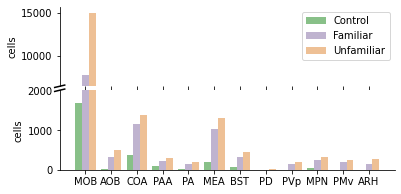

In [17]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, gridspec_kw={'hspace':0.05}, figsize=(6,3))
sns.barplot(
    data=with_father,
    x="area", y="cells", hue="group", palette="Accent", ax=ax_top)
sns.barplot(
    data=with_father,
    x="area", y="cells", hue="group", palette="Accent", ax=ax_bottom)
# sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_top)
# sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_bottom)
ax_top.set_ylim(bottom=6500)   # those limits are fake
ax_bottom.set_ylim(0,2000)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()
ax_bottom.set_xlabel("")
ax_top.set_xlabel("")
ax_top.legend_.set_title("")
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/hists_c57_WF.eps')

## WITHOUT FATHER

In [18]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='BL_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [19]:
control = pd.DataFrame(columns=['area', 'cells', 'group'])
fam = pd.DataFrame(columns=['area', 'cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'cells', 'group'])
control['area'] = list_acronyms
control['group'] = ['control' for area in list_areas]
control['cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in list_areas]

fam['area'] = list_acronyms
fam['group'] = ['familiar' for area in list_areas]
fam['cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in list_areas]

unfam['area'] = list_acronyms
unfam['group'] = ['unfamiliar' for area in list_areas]
unfam['cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in list_areas]
without_father = control.append(fam).append(unfam)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


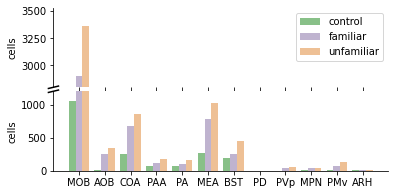

In [20]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, gridspec_kw={'hspace':0.05}, figsize=(6,3))
sns.barplot(
    data=without_father,
    x="area", y="cells", hue="group", palette="Accent", ax=ax_top)
sns.barplot(
    data=without_father,
    x="area", y="cells", hue="group", palette="Accent", ax=ax_bottom)
# sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_top)
# sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_bottom)
ax_top.set_ylim(bottom=2800)   # those limits are fake
ax_bottom.set_ylim(0,1200)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()
ax_top.legend_.set_title("")
ax_top.set_xlabel("")
ax_bottom.set_xlabel("")
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/hists_c57_WOF.eps')

# GRAPH DISTRIBUTIONS

In [28]:
with_father = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
wf_subjects = list(with_father.keys())
wf_experimental_groups = utils.divide_in_exp_groups(list_subjects=wf_subjects)
corr_threshold = 0.75
allen_order = list(volumes[volumes['st_level']==8]['acronym'])
df_levels = upls.create_df_levels(volumes)
wf_df_control, wf_df_fam, wf_df_unfam = \
ace.calculate_value_across_groups(experimental_groups=wf_experimental_groups, 
                              dict_results_across_mice=with_father, 
                              value='n_cells')

wf_df_ttest = ace.test_across_groups(df_control=wf_df_control, 
                               df_fam=wf_df_fam, 
                               df_unfam=wf_df_unfam)
wf_df_ttest_not_null = wf_df_ttest.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
wf_sig_areas = select_significant_areas(df=wf_df_ttest_not_null, threshold=0.05)
wf_corr_matrix_control = ace.cross_corr(wf_df_control)
wf_corr_matrix_fam = ace.cross_corr(wf_df_fam)
wf_corr_matrix_unfam = ace.cross_corr(wf_df_unfam)
wf_G_control = create_graph(wf_corr_matrix_control, volumes=volumes, 
                         significant_areas=wf_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')
wf_G_fam = create_graph(wf_corr_matrix_fam,  volumes=volumes, 
                         significant_areas=wf_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')
wf_G_unfam = create_graph(wf_corr_matrix_unfam,  volumes=volumes, 
                         significant_areas=wf_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')

/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:
/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:
/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:


In [29]:
without_father = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', 
                         allow_pickle=True).item()
wof_subjects = list(without_father.keys())
wof_experimental_groups = utils.divide_in_exp_groups(list_subjects=wof_subjects)
corr_threshold = 0.75
allen_order = list(volumes[volumes['st_level']==8]['acronym'])
df_levels = upls.create_df_levels(volumes)
wof_df_control, wof_df_fam, wof_df_unfam = \
ace.calculate_value_across_groups(experimental_groups=wof_experimental_groups, 
                              dict_results_across_mice=without_father, 
                              value='n_cells')

wof_df_ttest = ace.test_across_groups(df_control=wof_df_control, 
                               df_fam=wof_df_fam, 
                               df_unfam=wof_df_unfam)
wof_df_ttest_not_null = wof_df_ttest.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
wof_sig_areas = select_significant_areas(df=wof_df_ttest_not_null, threshold=0.05)
wof_corr_matrix_control = ace.cross_corr(wof_df_control)
wof_corr_matrix_fam = ace.cross_corr(wof_df_fam)
wof_corr_matrix_unfam = ace.cross_corr(wof_df_unfam)
wof_G_control = create_graph(wof_corr_matrix_control, volumes=volumes, 
                         significant_areas=wof_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')
wof_G_fam = create_graph(wof_corr_matrix_fam,  volumes=volumes, 
                         significant_areas=wof_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')
wof_G_unfam = create_graph(wof_corr_matrix_unfam,  volumes=volumes, 
                         significant_areas=wof_sig_areas, 
                         corr_threshold=corr_threshold, correlations='one')

/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:
/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:
/home/stella/Documents/Torino/projects/ClearMap2/ClearMap/Scripts/utils_graphs.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if significant_areas!=0:


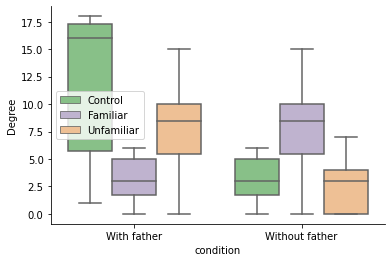

In [30]:
graphs=[wf_G_control, wf_G_fam, wf_G_unfam, wof_G_control, wof_G_fam, wof_G_unfam]
degree = [dict(nx.degree(G)) for G in graphs]
df_degree = pd.DataFrame(columns=['area', 'Degree',
                                  'group', 'condition'])
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Control', 'Familiar', 'Unfamiliar']):
        df = pd.DataFrame(columns=['area', 'Degree',
                                   'group', 'condition'])
        #idea
        df['area'] = degree[i+j].keys()
        df['group'] = [group for i in range(len(list(degree[i+j].keys())))]
        df['condition'] = [cond for i in range(len(list(degree[i+j].keys())))]
        df['Degree'] = degree[i+j].values()
        df_degree = df_degree.append(df)
        
fig, ax = plt.subplots(1,1)
sns.boxplot(data=df_degree, x='condition', 
               y='Degree', hue='group',
              palette='Accent', ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

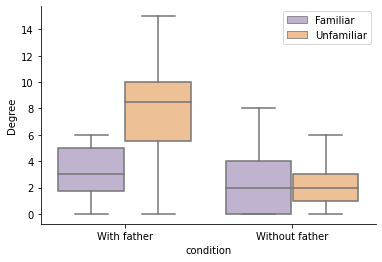

In [35]:
palette_accent = sns.color_palette("Accent", 3)
palette = sns.color_palette([palette_accent[1], palette_accent[2]])
graphs=[wf_G_fam, wf_G_unfam, wof_G_fam, wof_G_unfam]
degree = [dict(nx.degree(G)) for G in graphs]
df_degree = pd.DataFrame(columns=['area', 'Degree',
                                  'group', 'condition'])
    
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Familiar', 'Unfamiliar']):
        if i == 0 and j == 0:
            k = 0
        elif i == 0 and j == 1:
            k = 1
        elif i == 1 and j == 0:
            k = 2
        elif i == 1 and j == 1:
            k = 3
        df = pd.DataFrame(columns=['area', 'Degree',
                                   'group', 'condition'])
        #idea
        df['area'] = degree[k].keys()
        df['group'] = [group for i in range(len(list(degree[k].keys())))]
        df['condition'] = [cond for i in range(len(list(degree[k].keys())))]
        df['Degree'] = degree[k].values()
        df_degree = df_degree.append(df)
        
fig, ax = plt.subplots(1,1)
sns.boxplot(data=df_degree, x='condition', 
               y='Degree', hue='group',
              palette=palette, ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

## PLOT BETWEENNESS

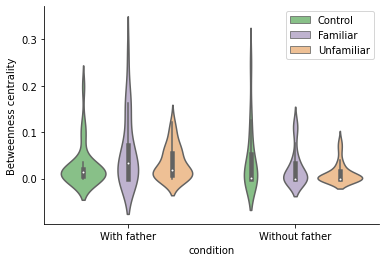

In [36]:
graphs=[wf_G_control, wf_G_fam, wf_G_unfam, wof_G_control, wof_G_fam, wof_G_unfam]
betweenness_centrality = [nx.betweenness_centrality(G) for G in graphs]
df_betweenness_centrality = pd.DataFrame(columns=['area', 'Betweenness centrality', 
                                             'Group', 'Condition'])
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Control', 'Familiar', 'Unfamiliar']):
        df = pd.DataFrame(columns=['area', 'Betweenness centrality',
                                   'group', 'condition'])
        if i == 0 and j == 0:
            k = 0
        elif i == 0 and j == 1:
            k = 1
        elif i == 0 and j == 2:
            k = 2
        elif i == 1 and j == 0:
            k = 3
        elif i == 1 and j == 1:
            k = 4
        elif i == 1 and j == 2:
            k = 5        
        #idea
        df['area'] = betweenness_centrality[k].keys()
        df['group'] = [group for i in range(len(list(betweenness_centrality[k].keys())))]
        df['condition'] = [cond for i in range(len(list(betweenness_centrality[k].keys())))]
        df['Betweenness centrality'] = betweenness_centrality[k].values()
        df_betweenness_centrality = df_betweenness_centrality.append(df)
        
fig, ax = plt.subplots(1,1)
sns.violinplot(data=df_betweenness_centrality, x='condition', 
               y='Betweenness centrality', hue='group',
              palette='Accent', ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

## PLOT DEGREE CENTRALITY

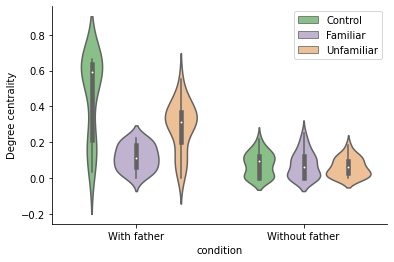

In [37]:
graphs=[wf_G_control, wf_G_fam, wf_G_unfam, wof_G_control, wof_G_fam, wof_G_unfam]
degree_centrality = [nx.degree_centrality(G) for G in graphs]
df_degree_centrality = pd.DataFrame(columns=['area', 'Degree centrality', 
                                             'Group', 'Condition'])
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Control', 'Familiar', 'Unfamiliar']):
        df = pd.DataFrame(columns=['area', 'betweenness centrality',
                                   'group', 'condition'])
        if i == 0 and j == 0:
            k = 0
        elif i == 0 and j == 1:
            k = 1
        elif i == 0 and j == 2:
            k = 2
        elif i == 1 and j == 0:
            k = 3
        elif i == 1 and j == 1:
            k = 4
        elif i == 1 and j == 2:
            k = 5 
        #idea
        df['area'] = degree_centrality[k].keys()
        df['group'] = [group for i in range(len(list(degree_centrality[k].keys())))]
        df['condition'] = [cond for i in range(len(list(degree_centrality[k].keys())))]
        df['Degree centrality'] = degree_centrality[k].values()
        df_degree_centrality = df_degree_centrality.append(df)
        
fig, ax = plt.subplots(1,1)
sns.violinplot(data=df_degree_centrality, x='condition', 
               y='Degree centrality', hue='group',
              palette='Accent', ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

## CLUSTERING

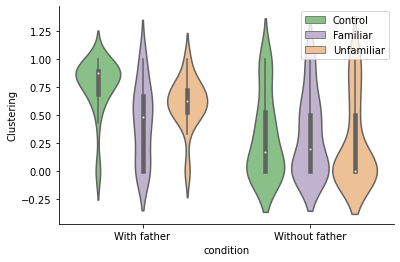

In [38]:
graphs=[wf_G_control, wf_G_fam, wf_G_unfam, wof_G_control, wof_G_fam, wof_G_unfam]
clustering = [nx.clustering(G) for G in graphs]
df_clustering = pd.DataFrame(columns=['area', 'Clustering', 
                                             'Group', 'Condition'])
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Control', 'Familiar', 'Unfamiliar']):
        df = pd.DataFrame(columns=['area', 'Clustering',
                                   'group', 'condition'])
        if i == 0 and j == 0:
            k = 0
        elif i == 0 and j == 1:
            k = 1
        elif i == 0 and j == 2:
            k = 2
        elif i == 1 and j == 0:
            k = 3
        elif i == 1 and j == 1:
            k = 4
        elif i == 1 and j == 2:
            k = 5 
        #idea
        df['area'] = clustering[k].keys()
        df['group'] = [group for i in range(len(list(clustering[k].keys())))]
        df['condition'] = [cond for i in range(len(list(clustering[k].keys())))]
        df['Clustering'] = clustering[k].values()
        df_clustering = df_clustering.append(df)
        
fig, ax = plt.subplots(1,1)
sns.violinplot(data=df_clustering, x='condition', 
               y='Clustering', hue='group',
              palette='Accent', ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

## RICH CLUB COEFFICIENT

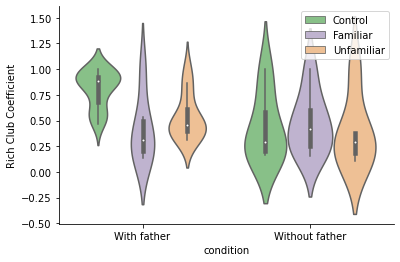

In [39]:
graphs=[wf_G_control, wf_G_fam, wf_G_unfam, wof_G_control, wof_G_fam, wof_G_unfam]
rich_club_coefficient = [nx.rich_club_coefficient(G, normalized=False) for G in graphs]
df_rich_club_coefficient = pd.DataFrame(columns=['area', 'Rich Club Coefficient', 
                                             'Group', 'Condition'])
for i, cond in enumerate(['With father', 'Without father']):
    for j, group in enumerate(['Control', 'Familiar', 'Unfamiliar']):
        df = pd.DataFrame(columns=['area', 'Rich Club Coefficient',
                                   'group', 'condition'])
        if i == 0 and j == 0:
            k = 0
        elif i == 0 and j == 1:
            k = 1
        elif i == 0 and j == 2:
            k = 2
        elif i == 1 and j == 0:
            k = 3
        elif i == 1 and j == 1:
            k = 4
        elif i == 1 and j == 2:
            k = 5 
        #idea
        df['area'] = rich_club_coefficient[k].keys()
        df['group'] = [group for i in range(len(list(rich_club_coefficient[k].keys())))]
        df['condition'] = [cond for i in range(len(list(rich_club_coefficient[k].keys())))]
        df['Rich Club Coefficient'] = rich_club_coefficient[k].values()
        df_rich_club_coefficient = df_rich_club_coefficient.append(df)
        
fig, ax = plt.subplots(1,1)
sns.violinplot(data=df_rich_club_coefficient, x='condition', 
               y='Rich Club Coefficient', hue='group',
              palette='Accent', ax=ax)
sns.despine(right=True)
ax.legend_.set_title("")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


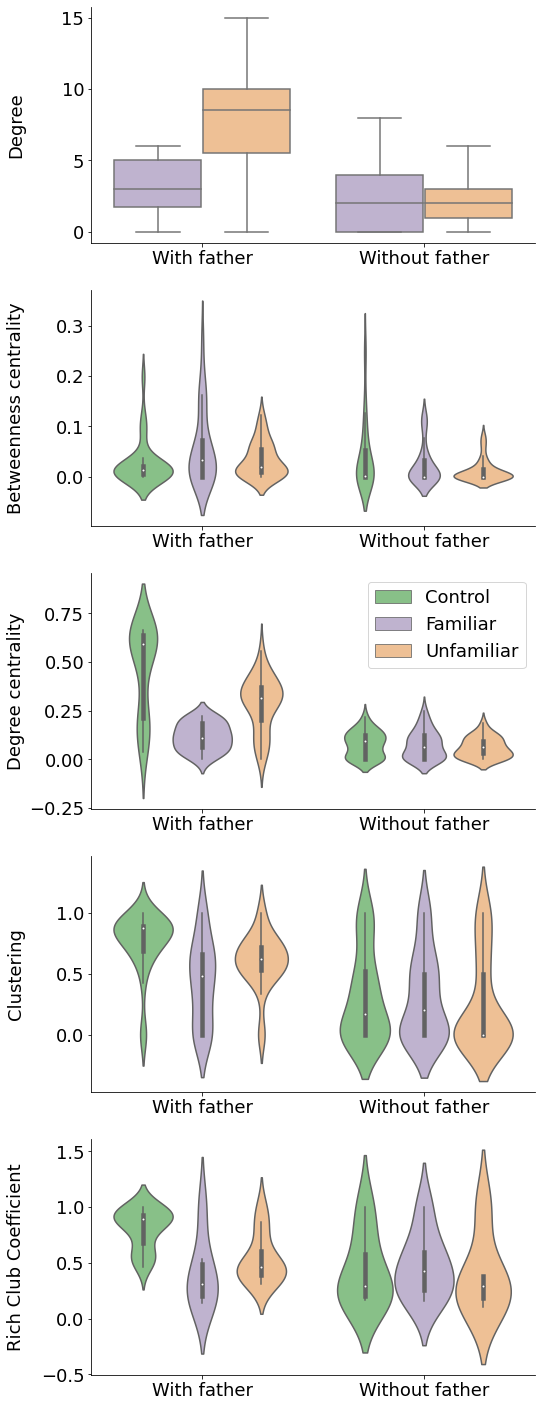

In [41]:
fig, axes = plt.subplots(5,1, figsize=(8,20))
plt.subplots_adjust(top=0.98, bottom=0.03, right=0.97, left=0.2)
fig.align_ylabels(axes)
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
        
palette_accent = sns.color_palette("Accent", 3)
palette = sns.color_palette([palette_accent[1], palette_accent[2]])
sns.boxplot(data=df_degree, x='condition', 
               y='Degree', hue='group',
              palette=palette, ax=axes[0])
sns.despine(right=True)
ax.legend_.set_title("")
axes[0].get_legend().remove()
axes[0].set_xlabel('')

sns.violinplot(data=df_betweenness_centrality, x='condition', 
               y='Betweenness centrality', hue='group',
              palette='Accent', inner='box',ax=axes[1])
sns.despine(right=True)
axes[1].get_legend().remove()
axes[1].set_xlabel('')

sns.violinplot(data=df_degree_centrality, x='condition', 
               y='Degree centrality', hue='group',
              palette='Accent', inner='box',ax=axes[2])
axes[2].legend_.set_title("")
axes[2].set_xlabel('')

sns.violinplot(data=df_clustering, x='condition', 
               y='Clustering', hue='group',
              palette='Accent', inner='box', ax=axes[3])
sns.despine(right=True)
axes[3].get_legend().remove()
axes[3].set_xlabel('')

sns.violinplot(data=df_rich_club_coefficient, x='condition', 
               y='Rich Club Coefficient', hue='group',
              palette='Accent', inner='box', ax=axes[4])
sns.despine(right=True)
axes[4].get_legend().remove()
axes[4].set_xlabel('')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/graph_distributions5.eps')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/graph_distributions5.png')

# BOXPLOTS

# FOLD CHANGE

## WITH FATHER

In [27]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
batch='c57'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [28]:
control = pd.DataFrame(columns=['area', 'cells', 'group'])
fam = pd.DataFrame(columns=['area', 'cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'cells', 'group'])
control['area'] = list_acronyms
control['group'] = ['Control' for area in list_areas]
control['cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in list_areas]

fam['area'] = list_acronyms
fam['group'] = ['Familiar' for area in list_areas]
fam['cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in list_areas]

unfam['area'] = list_acronyms
unfam['group'] = ['Unfamiliar' for area in list_areas]
unfam['cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in list_areas]
fold_change_wf = pd.DataFrame(columns=['area', 'fold change', 'group'])
fold_change_wf['area'] = [area for area in list_acronyms] + [area for area in list_acronyms]
fold_change_wf['group'] = ['Familiar' for area in list_areas] + ['Unfamiliar' for area in list_areas]
fold_change_wf['fold change'] = fam['cells'].div(control['cells']).append(unfam['cells'].div(control['cells'])).tolist()

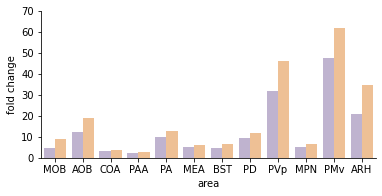

In [43]:
palette_accent = sns.color_palette("Accent", 3)
palette = sns.color_palette([palette_accent[1], palette_accent[2]])
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,3))
plt.subplots_adjust(bottom=0.2)
sns.barplot(
    data=fold_change_wf,
    x="area", y="fold change", hue="group", palette=palette, ax=ax)
ax.set_ylim(0,70)
sns.despine(ax=ax, right=True)
ax.legend_.set_title("")
ax.get_legend().remove()
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/foldchange_c57_WF.eps')

## WITHOUT FATHER

In [30]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='BL_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [31]:
control = pd.DataFrame(columns=['area', 'cells', 'group'])
fam = pd.DataFrame(columns=['area', 'cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'cells', 'group'])
control['area'] = list_acronyms
control['group'] = ['Control' for area in list_areas]
control['cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in list_areas]

fam['area'] = list_acronyms
fam['group'] = ['Familiar' for area in list_areas]
fam['cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in list_areas]

unfam['area'] = list_acronyms
unfam['group'] = ['Unfamiliar' for area in list_areas]
unfam['cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in list_areas]
fold_change_wof = pd.DataFrame(columns=['area', 'fold change', 'group'])
fold_change_wof['area'] = [area for area in list_acronyms] + [area for area in list_acronyms]
fold_change_wof['group'] = ['Familiar' for area in list_areas] + ['Unfamiliar' for area in list_areas]
fold_change_wof['fold change'] = fam['cells'].div(control['cells']).append(unfam['cells'].div(control['cells'])).tolist()

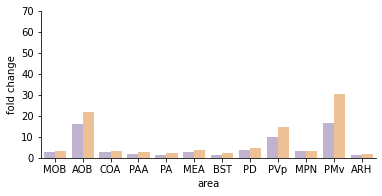

In [42]:
palette_accent = sns.color_palette("Accent", 3)
palette = sns.color_palette([palette_accent[1], palette_accent[2]])
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,3))
plt.subplots_adjust(bottom=0.2)
sns.barplot(
    data=fold_change_wof,
    x="area", y="fold change", hue="group", palette=palette, ax=ax)

sns.despine(ax=ax, right=True)
ax.set_ylim(0,70)
ax.legend_.set_title("")
ax.get_legend().remove()
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/foldchange_c57_WOF.eps')

In [3]:
for i, group in zip([0,1], ['a', 'b']):
    for j, group in zip([1,2], ['c', 'd']):
        print(i+j, group)

1 c
2 d
2 c
3 d


0 ('a', 'c')
1 ('b', 'd')
